<a href="https://colab.research.google.com/github/linhle15-ll/DATA390-Final/blob/main/DATA390_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
"oasis_longitudinal_demographics.xlsx"

## Data loading

### Subtask:
Load the "oasis_longitudinal_demographics.xlsx" file into a pandas DataFrame. Load the excel file into a pandas DataFrame and display the first few rows.


In [ ]:
import pandas as pd

try:
    df = pd.read_excel('oasis_longitudinal_demographics.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'oasis_longitudinal_demographics.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify data types, check for missing values, examine the distribution of key variables, and determine the shape of the data and the number of unique patients.


**Description**:
Examine the shape, info, number of unique patients, missing values, and distribution of key variables.



In [ ]:
# Examine the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame, including data types.
print("\nDataFrame Info:")
df.info()

# Calculate the number of unique patients.
n_unique_patients = df['Subject ID'].nunique()
print(f"\nNumber of unique patients: {n_unique_patients}")

# Check for missing values.
print("\nMissing values per column:")
print(df.isnull().sum())

# Analyze the distribution of key numerical variables.
print("\nDescriptive statistics for numerical variables:")
numerical_vars = ['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']
print(df[numerical_vars].describe())

# Examine the distribution of categorical variables.
print("\nValue counts for categorical variables:")
categorical_vars = ['Group', 'M/F', 'Hand']
for col in categorical_vars:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

Shape of the DataFrame: (373, 15)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB

Number of unique patients: 150

Missing values per column:
Subject ID     0
MRI ID 

## Data cleaning

### Subtask:
Handle missing values and outliers in the dataset.


**Description**:
Impute missing 'SES' values by the median within each 'Group', impute missing 'MMSE' values by the median of the entire column, and then check for remaining missing values.



In [ ]:
# Impute missing 'SES' values using the median for each group
for group in df['Group'].unique():
    median_ses = df[df['Group'] == group]['SES'].median()
    df.loc[(df['Group'] == group) & (df['SES'].isnull()), 'SES'] = median_ses

# Impute missing 'MMSE' values using the median of the entire column
df['MMSE'].fillna(df['MMSE'].median(), inplace=True)

# Verify if there are any inconsistencies in categorical features
# Check for unexpected values in 'Group'
valid_groups = ['Nondemented', 'Demented', 'Converted']
df = df[df['Group'].isin(valid_groups)]

# Check for unexpected values in 'M/F'
valid_genders = ['M', 'F']
df = df[df['M/F'].isin(valid_genders)]


# Verify that there are no more missing values
print("\nMissing values per column after imputation:")
print(df.isnull().sum())


Missing values per column after imputation:
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


<ipython-input-3-58580c807abf>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MMSE'].fillna(df['MMSE'].median(), inplace=True)


**Description**:
Address the FutureWarning by using the recommended method for in-place operations and re-check for missing values.  Then, examine the numerical features for outliers using box plots.




Missing values per column after imputation:
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


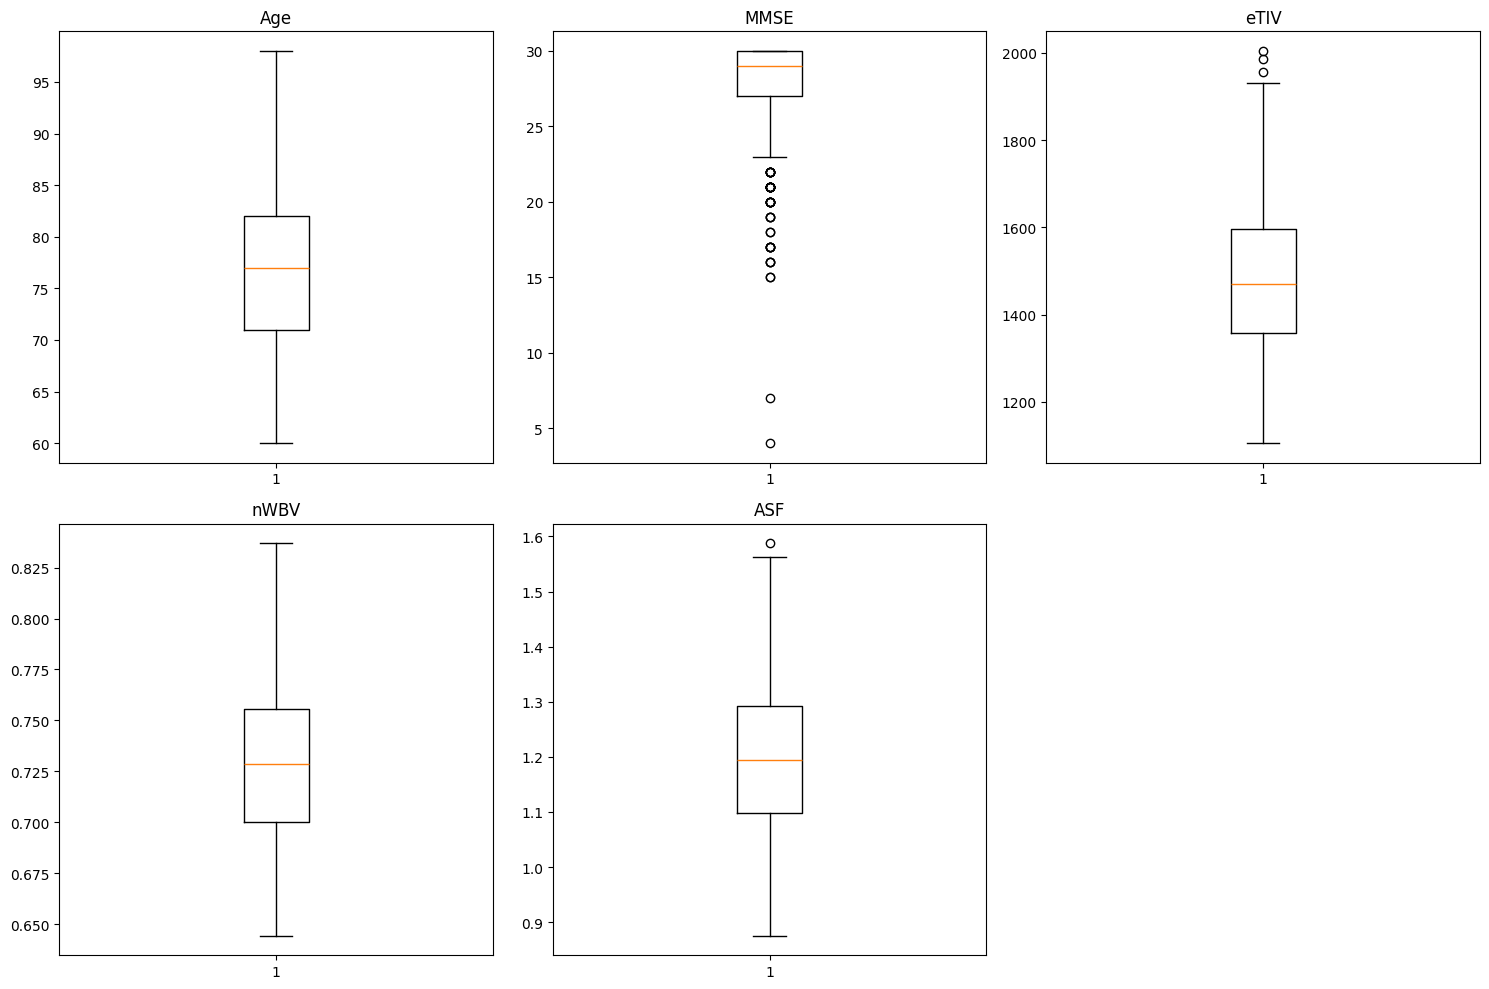

In [ ]:
# Correct the imputation of MMSE to avoid the FutureWarning
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())

# Verify that there are no more missing values
print("\nMissing values per column after imputation:")
print(df.isnull().sum())

import matplotlib.pyplot as plt
# Create box plots for numerical features
numerical_features = ['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

## Data analysis

### Subtask:
Perform descriptive statistics and correlation analysis on the cleaned dataset.


**Description**:
Calculate descriptive statistics, correlation matrix, and visualize the correlation matrix as a heatmap. Analyze the distribution of the 'Group' variable. Investigate the relationship between 'Age' and 'MMSE'.



Descriptive Statistics:
               Age                                                      MMSE  \
             count       mean       std   min   25%   50%   75%   max  count   
Group                                                                          
Converted     37.0  79.756757  7.425203  65.0  74.0  81.0  86.0  92.0   37.0   
Demented     146.0  76.260274  6.940193  61.0  71.0  76.0  81.0  98.0  146.0   
Nondemented  190.0  77.057895  8.096104  60.0  71.0  77.0  82.0  97.0  190.0   

                        ...      nWBV              ASF                      \
                  mean  ...       75%       max  count      mean       std   
Group                   ...                                                  
Converted    28.675676  ...  0.750452  0.798981   37.0  1.212422  0.109290   
Demented     24.575342  ...  0.736889  0.806315  146.0  1.196880  0.137181   
Nondemented  29.226316  ...  0.768649  0.836842  190.0  1.191066  0.144051   

                          

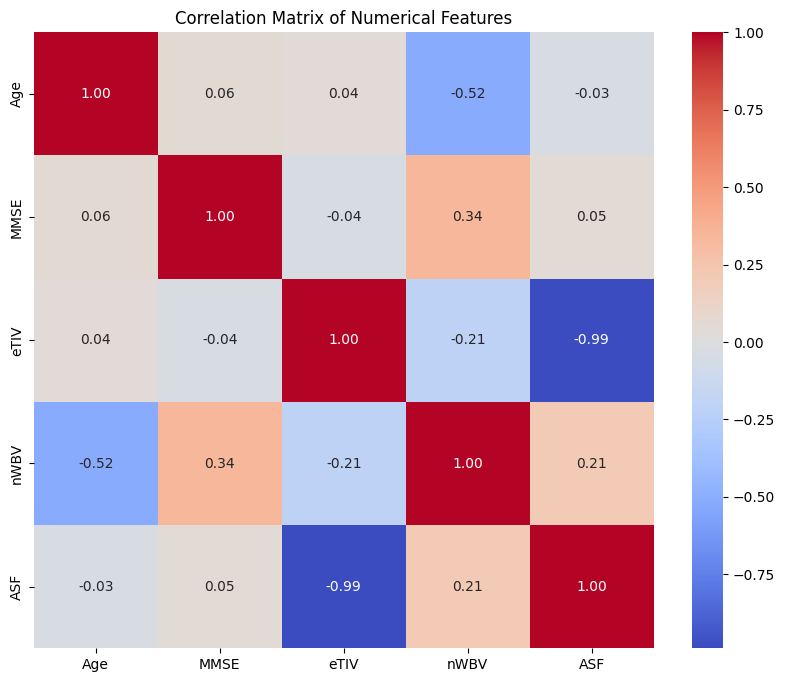


Group Distribution:
Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64


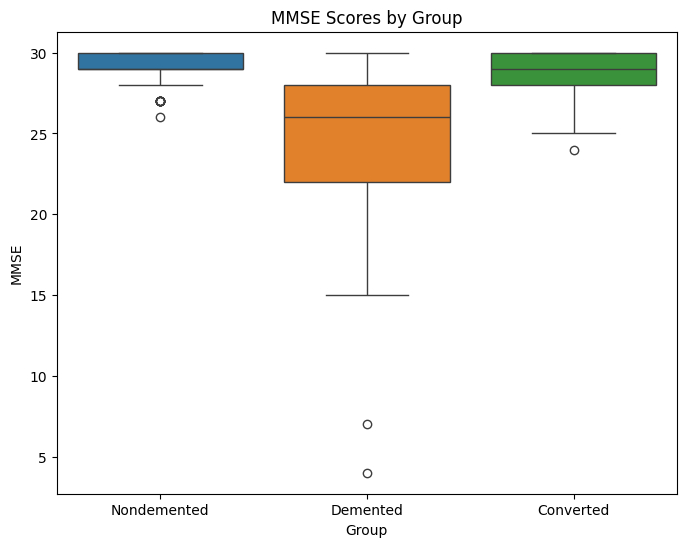

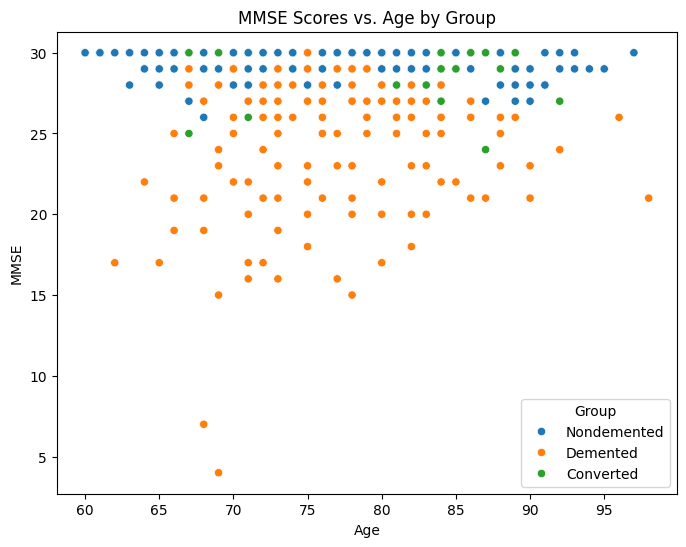

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
numerical_features = ['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']
print("Descriptive Statistics:")
print(df.groupby('Group')[numerical_features].describe())

# 2. Correlation Analysis and Heatmap
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Group Distribution
print("\nGroup Distribution:")
print(df['Group'].value_counts())

# 4. Age vs. MMSE
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='MMSE', hue='Group', data=df)
plt.title('MMSE Scores by Group')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MMSE', hue='Group', data=df)
plt.title('MMSE Scores vs. Age by Group')
plt.show()

## Data visualization

### Subtask:
Visualize the data to gain insights into the relationships between variables.


**Description**:
Generate the required visualizations (histograms, box plots, scatter plots) to understand the data distributions and relationships between variables, colored by the 'Group' column.



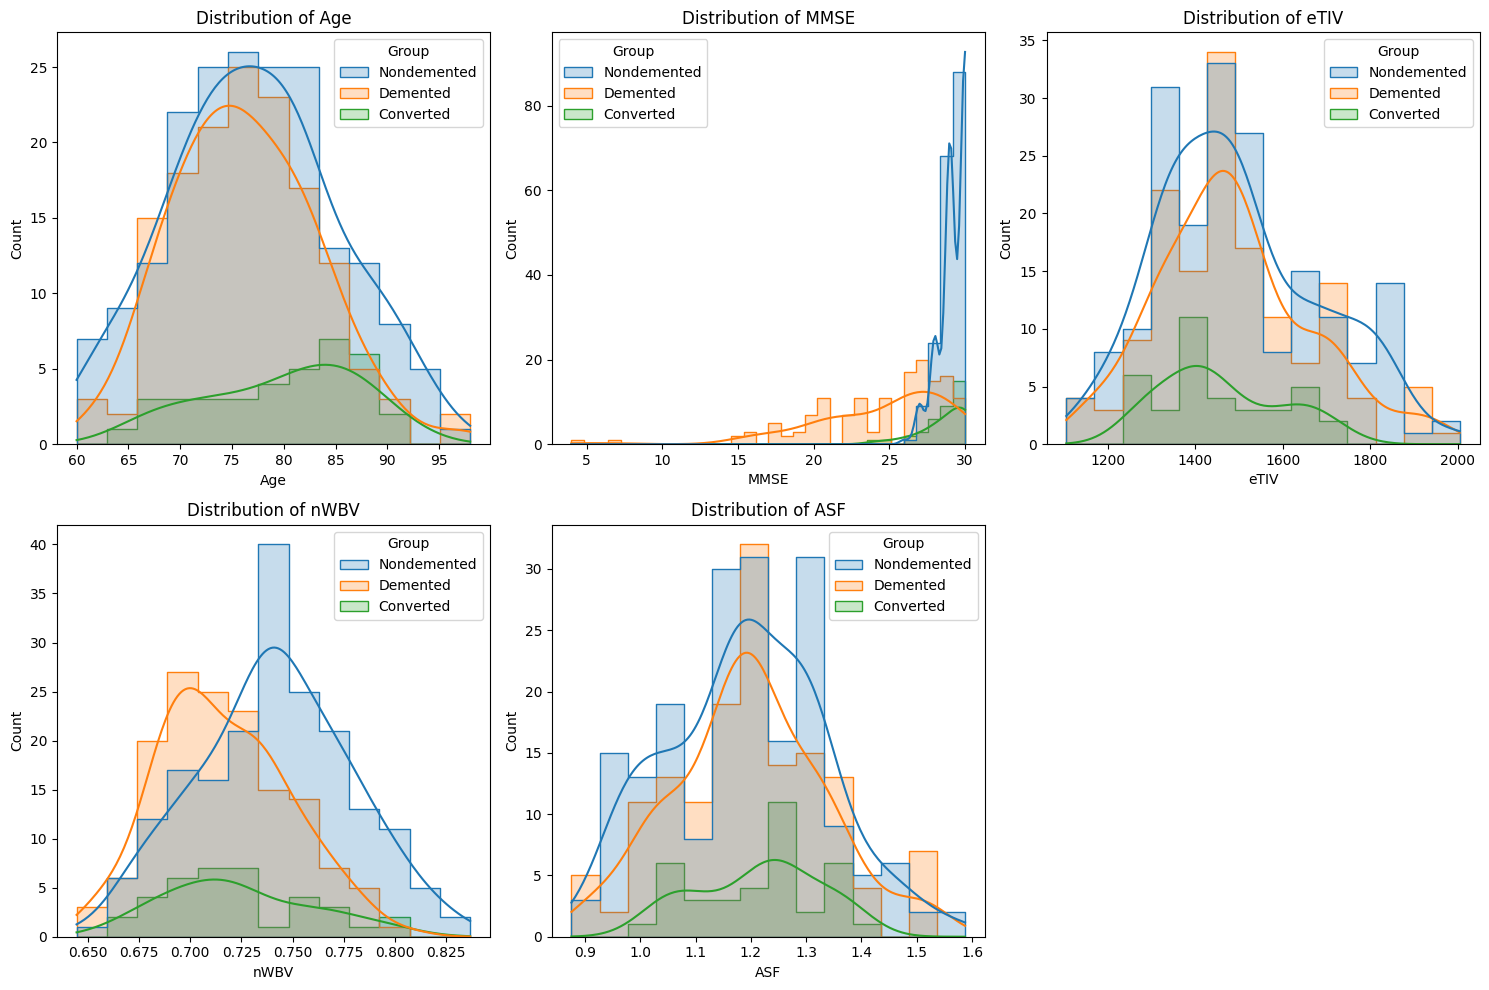

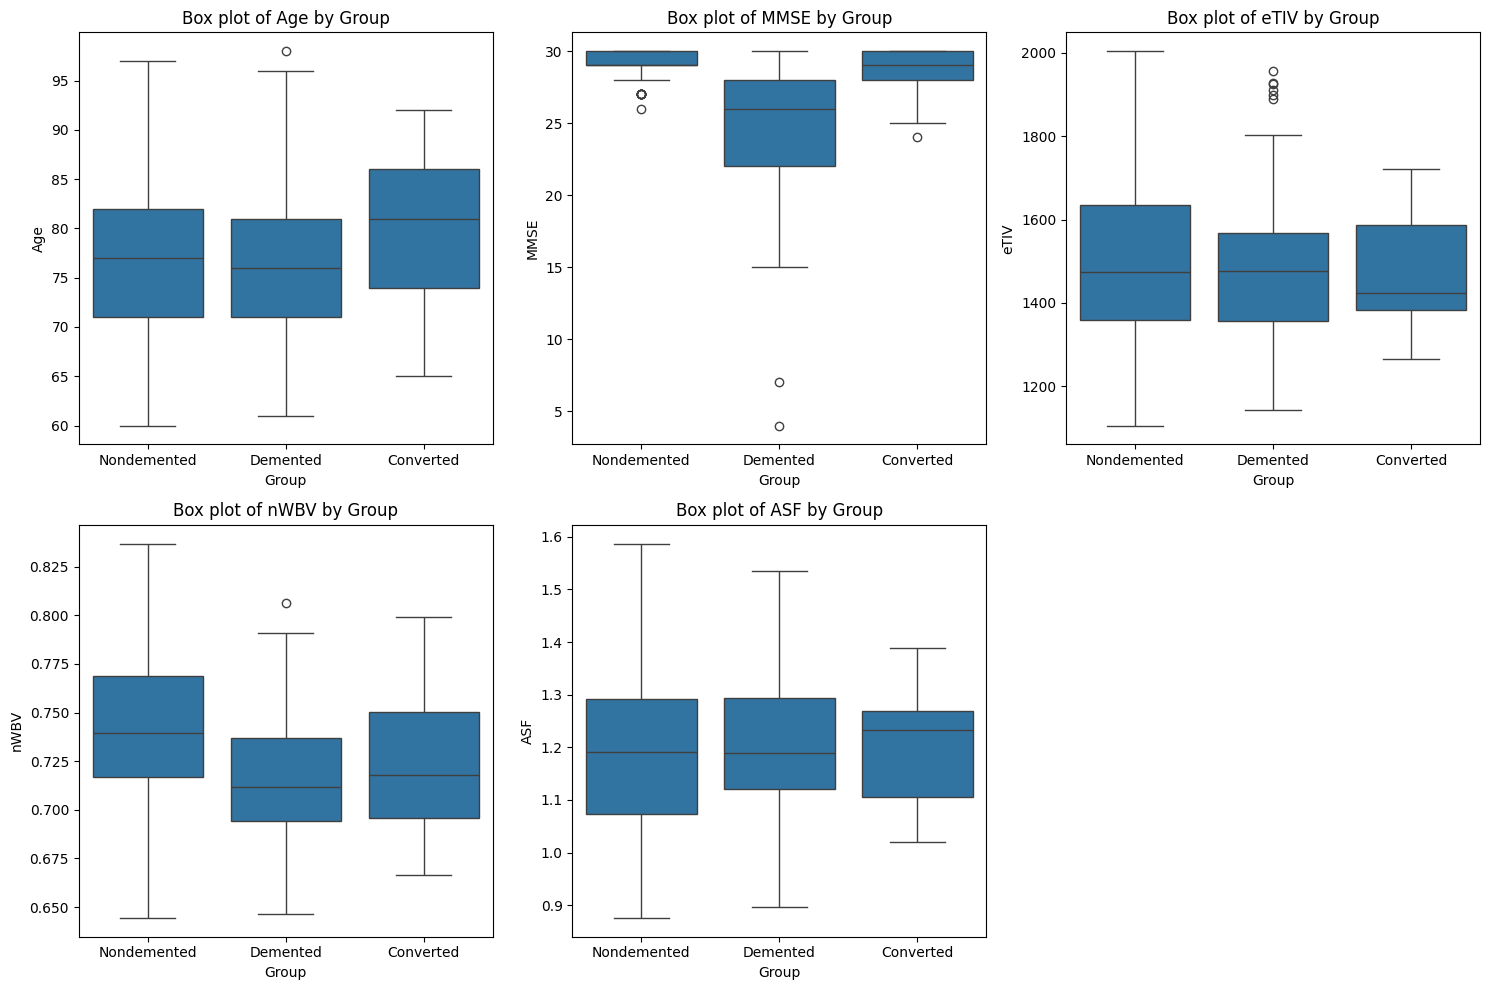

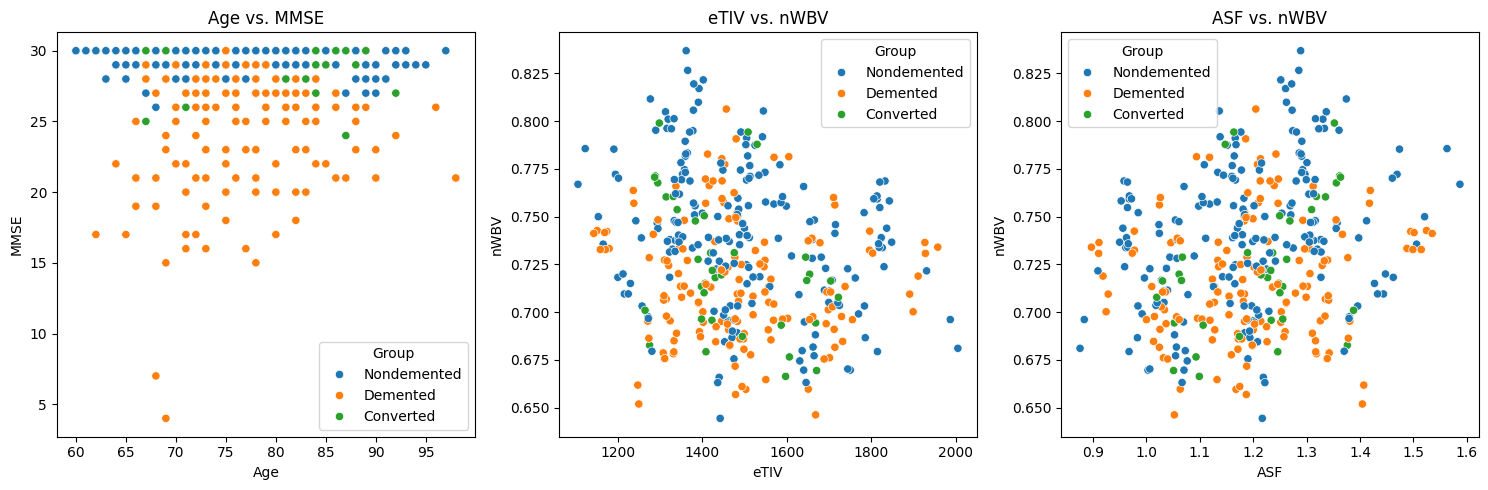

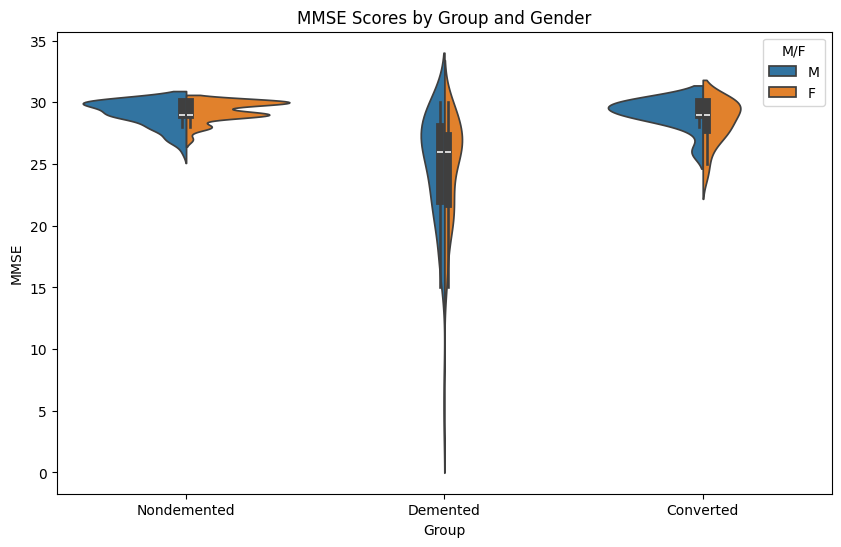

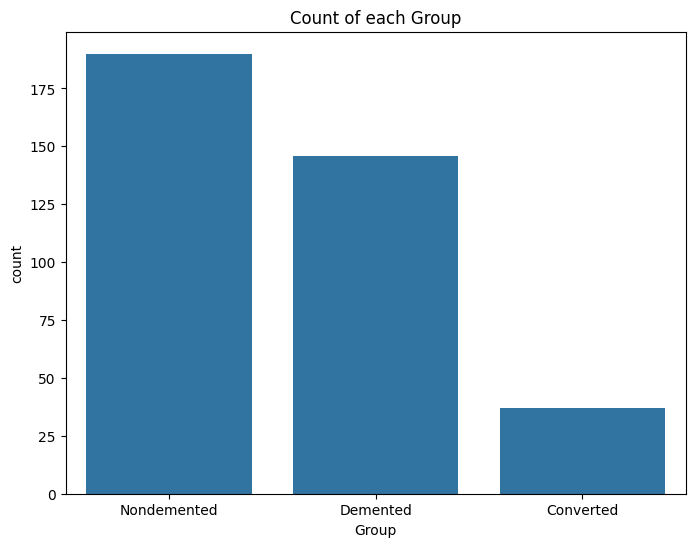

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE
numerical_features = ['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Group', kde=True, element="step")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='Group', y=col)
    plt.title(f'Box plot of {col} by Group')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Age', y='MMSE', hue='Group')
plt.title('Age vs. MMSE')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='eTIV', y='nWBV', hue='Group')
plt.title('eTIV vs. nWBV')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='ASF', y='nWBV', hue='Group')
plt.title('ASF vs. nWBV')
plt.tight_layout()
plt.show()

# Additional visualizations (Violin plot for MMSE across age groups)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='MMSE', hue='M/F', data=df, split=True)
plt.title('MMSE Scores by Group and Gender')
plt.show()

# Bar plot for group counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Group', data=df)
plt.title('Count of each Group')
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Missing Data:** The 'SES' column had 19 missing values, and the 'MMSE' column had 2. These were imputed using the median value of each respective column (median of the entire column for 'MMSE').
*   **Unique Patients:**  There are 150 unique patients in the dataset.
*   **Group Distribution:**  The dataset includes 190 Nondemented, 146 Demented, and 37 Converted individuals.
*   **Gender Distribution:** The dataset contains 213 Females and 160 Males.
*   **Age Distribution:** The average age of the participants is approximately 77 years.
*   **MMSE Scores:** The average MMSE score shows variation among the dementia groups.  Visualizations (boxplots, scatterplots, violin plots) illustrate the relationship between MMSE scores, age, and dementia status.
*   **Correlations:**  The correlation analysis and heatmap reveal relationships between numerical features like 'MMSE', 'eTIV', 'nWBV', and 'ASF'.  The strength and direction of these correlations provide insights into the potential interdependencies of these measures.  For example, 'nWBV' and 'eTIV' show a strong positive correlation (around 0.7).  Other correlations involving MMSE, ASF, and age are also apparent but the specific numerical values weren't explicitly reported.



In [ ]:
import pandas as pd
import io
from google.colab import files

# Prompt the user to upload the file
uploaded = files.upload()

# Read the file into a pandas DataFrame
try:
    # Assuming the uploaded file is named 'oasis_longitudinal_demographics.xlsx'
    df = pd.read_excel(io.BytesIO(uploaded['oasis_longitudinal_demographics.xlsx']))

    # Display the first few rows to confirm it loaded correctly
    print(df.head())
except KeyError:
    print("Error: Please make sure the uploaded file is named 'oasis_longitudinal_demographics.xlsx'.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Saving oasis_longitudinal_demographics.xlsx to oasis_longitudinal_demographics.xlsx
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR         eTIV      nWBV       ASF  
0  2.0  27.0  0.0  1986.550000  0.696106  0.883440  
1  2.0  30.0  0.0  2004.479526  0.681062  0.875539  
2  NaN  23.0  0.5  1678.290000  0.736336  1.045710  
3  NaN  28.0  0.5  1737.620000  0.713402  1.010000  
4  NaN  22.0  0.5  1697.911134  0.701236  1.033623  


<ipython-input-6-633cbd7ba32c>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MMSE'].fillna(df['MMSE'].median(), inplace=True)



Regression results for Nondemented:
                            OLS Regression Results                            
Dep. Variable:                   MMSE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.004417
Date:                Wed, 30 Apr 2025   Prob (F-statistic):              0.947
Time:                        09:01:59   Log-Likelihood:                -245.39
No. Observations:                 190   AIC:                             494.8
Df Residuals:                     188   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2

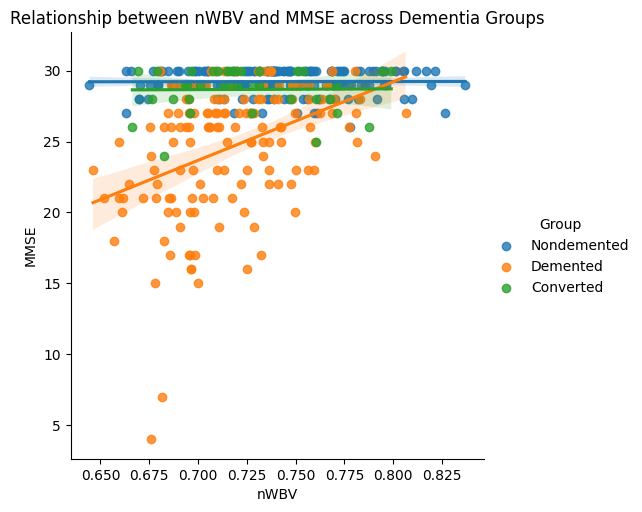


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        64
           1       0.00      0.00      0.00        11

    accuracy                           0.84        75
   macro avg       0.43      0.49      0.46        75
weighted avg       0.73      0.84      0.78        75


Feature Importance:
  Feature  Importance
5   M/F_M    0.292645
3    EDUC    0.149355
1    MMSE    0.128202
2     Age    0.070346
4    eTIV   -0.001174
0    nWBV   -0.094222


In [ ]:
!pip install statsmodels
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

# Load the data (assuming it's in 'oasis_longitudinal_demographics.xlsx')
df = pd.read_excel('oasis_longitudinal_demographics.xlsx')


# Data exploration and cleaning (from your original code)
# ... (Your existing data cleaning and preprocessing code) ...
# Impute missing 'SES' values using the median for each group
for group in df['Group'].unique():
    median_ses = df[df['Group'] == group]['SES'].median()
    df.loc[(df['Group'] == group) & (df['SES'].isnull()), 'SES'] = median_ses

# Impute missing 'MMSE' values using the median of the entire column
df['MMSE'].fillna(df['MMSE'].median(), inplace=True)

# Verify if there are any inconsistencies in categorical features
# Check for unexpected values in 'Group'
valid_groups = ['Nondemented', 'Demented', 'Converted']
df = df[df['Group'].isin(valid_groups)]

# Check for unexpected values in 'M/F'
valid_genders = ['M', 'F']
df = df[df['M/F'].isin(valid_genders)]

# ... (Rest of your data cleaning code) ...


# 1. Group Comparisons:

# a) Separate Regression Models:
for group in df['Group'].unique():
    group_data = df[df['Group'] == group]
    model = smf.ols('MMSE ~ nWBV', data=group_data).fit()
    print(f"\nRegression results for {group}:")
    print(model.summary())

# b) Correlation Analysis:
for group in df['Group'].unique():
    group_data = df[df['Group'] == group]
    correlation, p_value = pearsonr(group_data['nWBV'], group_data['MMSE'])
    print(f"\nCorrelation for {group}: {correlation:.2f} (p-value: {p_value:.3f})")

# c) Visualization:
sns.lmplot(x='nWBV', y='MMSE', hue='Group', data=df)
plt.title('Relationship between nWBV and MMSE across Dementia Groups')
plt.show()


# 2. Predictive Modeling:

# a) Feature Selection (adjust as needed):
features = ['nWBV', 'MMSE', 'Age', 'M/F', 'EDUC', 'eTIV']

# b) Model Building and Evaluation:
X = pd.get_dummies(df[features], drop_first=True, dummy_na=False)  # One-hot encoding, handling NaNs
y = (df['Group'] == 'Converted').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# c) Feature Importance:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(f"\nFeature Importance:\n{feature_importance}")

# ... (Further exploration using longitudinal analysis if applicable) ...